In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_frame = pd.read_csv('./h1b_disclosure_data_2015_2019.csv')

In [5]:
data_frame

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857211,I-200-19053-522403,CERTIFIED,JETBLUE AIRWAYS,TRANSPORTATION INSPECTORS,53-6051,SENIOR INVESTIGATOR AIR SAFETY,Y,74152.0,Long Island City,NEWYORK,2019,NEW YORK,"Long Island City, NEW YORK"
857212,I-200-18282-647333,CERTIFIED,AMERICAN FAMILY MUTUAL INSURANCE COMPANY,15-2031,OPERATIONS RESEARCH ANALYSTS,DIGITAL TOUCHPOINTS ANALYST,Y,75733.0,MADISON,WI,2019,WISCONSIN,"MADISON, WISCONSIN"
857213,I-200-19046-203745,DENIED,CAPGEMINI AMERICA INC,NaN,NaN,APPLICATIONS CONSULTANT 2,Y,80704.0,DEARBORN,MICHIGAN,2019,MICHIGAN,"DEARBORN, MICHIGAN"
857214,I-200-19059-900658,DENIED,CAPGEMINI AMERICA INC,NaN,NaN,BUSINESS SYSTEMS ANALYST 2,Y,74443.0,NEW YORK,NEWYORK,2019,NEW YORK,"NEW YORK, NEW YORK"


---
## Revisamos los datos null
---

In [6]:
NaN = data_frame.isna().sum()
NaN

CASE_NUMBER             0
CASE_STATUS             0
EMPLOYER_NAME          21
SOC_NAME                6
SOC_CODE                4
JOB_TITLE               5
FULL_TIME_POSITION      1
PREVAILING_WAGE         4
WORKSITE_CITY          28
WORKSITE_STATE_ABB      0
YEAR                    0
WORKSITE_STATE_FULL     0
WORKSITE                0
dtype: int64

---
## Eliminamos los campos que contienene null
## tambien se eliminan las columnas ***WORKSITE_STATE_ABB*** , ***WORKSITE***
## ya que tenemos a ***WORKSITE_CITY*** que nos muestra la ciudad y ***WORKSITE_STATE_FULL*** el estado
---

In [7]:
data_frame = data_frame.dropna(subset=['EMPLOYER_NAME', 'SOC_NAME','SOC_CODE', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'WORKSITE_CITY'], axis=0)
data_frame = data_frame.drop(['WORKSITE_STATE_ABB', 'WORKSITE'], axis=1)

data_frame

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,YEAR,WORKSITE_STATE_FULL
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",2015,PENNSYLVANIA
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,2015,PENNSYLVANIA
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,2015,NEW YORK
...,...,...,...,...,...,...,...,...,...,...,...
857208,I-203-19105-914081,CERTIFIED,AERO SPRAY INC.,COMMERCIAL PILOTS,53-2012,FIRE FIGHTING PILOT,N,83340.0,Appleton,2019,MINNESOTA
857209,I-200-19043-930707,DENIED,FIERI SB INC,HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS,53-3032,CDL TRUCK DRIVER,Y,54246.0,Elmhurst,2019,ILLINOIS
857210,I-200-19060-000930,CERTIFIED,FIERI SB INC,HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS,53-3032,CDL TRUCK DRIVER,Y,65000.0,Elmhurst,2019,ILLINOIS
857211,I-200-19053-522403,CERTIFIED,JETBLUE AIRWAYS,TRANSPORTATION INSPECTORS,53-6051,SENIOR INVESTIGATOR AIR SAFETY,Y,74152.0,Long Island City,2019,NEW YORK


---
## Revisamos de nuevo que no nos haya quedado algun dato null
---

In [8]:
NaN_updated = data_frame.isna().sum()
NaN_updated

CASE_NUMBER            0
CASE_STATUS            0
EMPLOYER_NAME          0
SOC_NAME               0
SOC_CODE               0
JOB_TITLE              0
FULL_TIME_POSITION     0
PREVAILING_WAGE        0
WORKSITE_CITY          0
YEAR                   0
WORKSITE_STATE_FULL    0
dtype: int64

---
## Filtramos el data frame por status certified ya que necesitamos los datos de las visas h1-b que se aprobaron
---

In [9]:
data = data_frame[data_frame['CASE_STATUS'] == "CERTIFIED"]
data_2015 = data[data['YEAR'] == 2015]
data_2016 = data[data['YEAR'] == 2016]
data_2017 = data[data['YEAR'] == 2017]
data_2018 = data[data['YEAR'] == 2018]
data_2019 = data[data['YEAR'] == 2019]


---
# ¿Que estados ofrecen la mayor cantidad de visas H1-B? (separados por año)
---

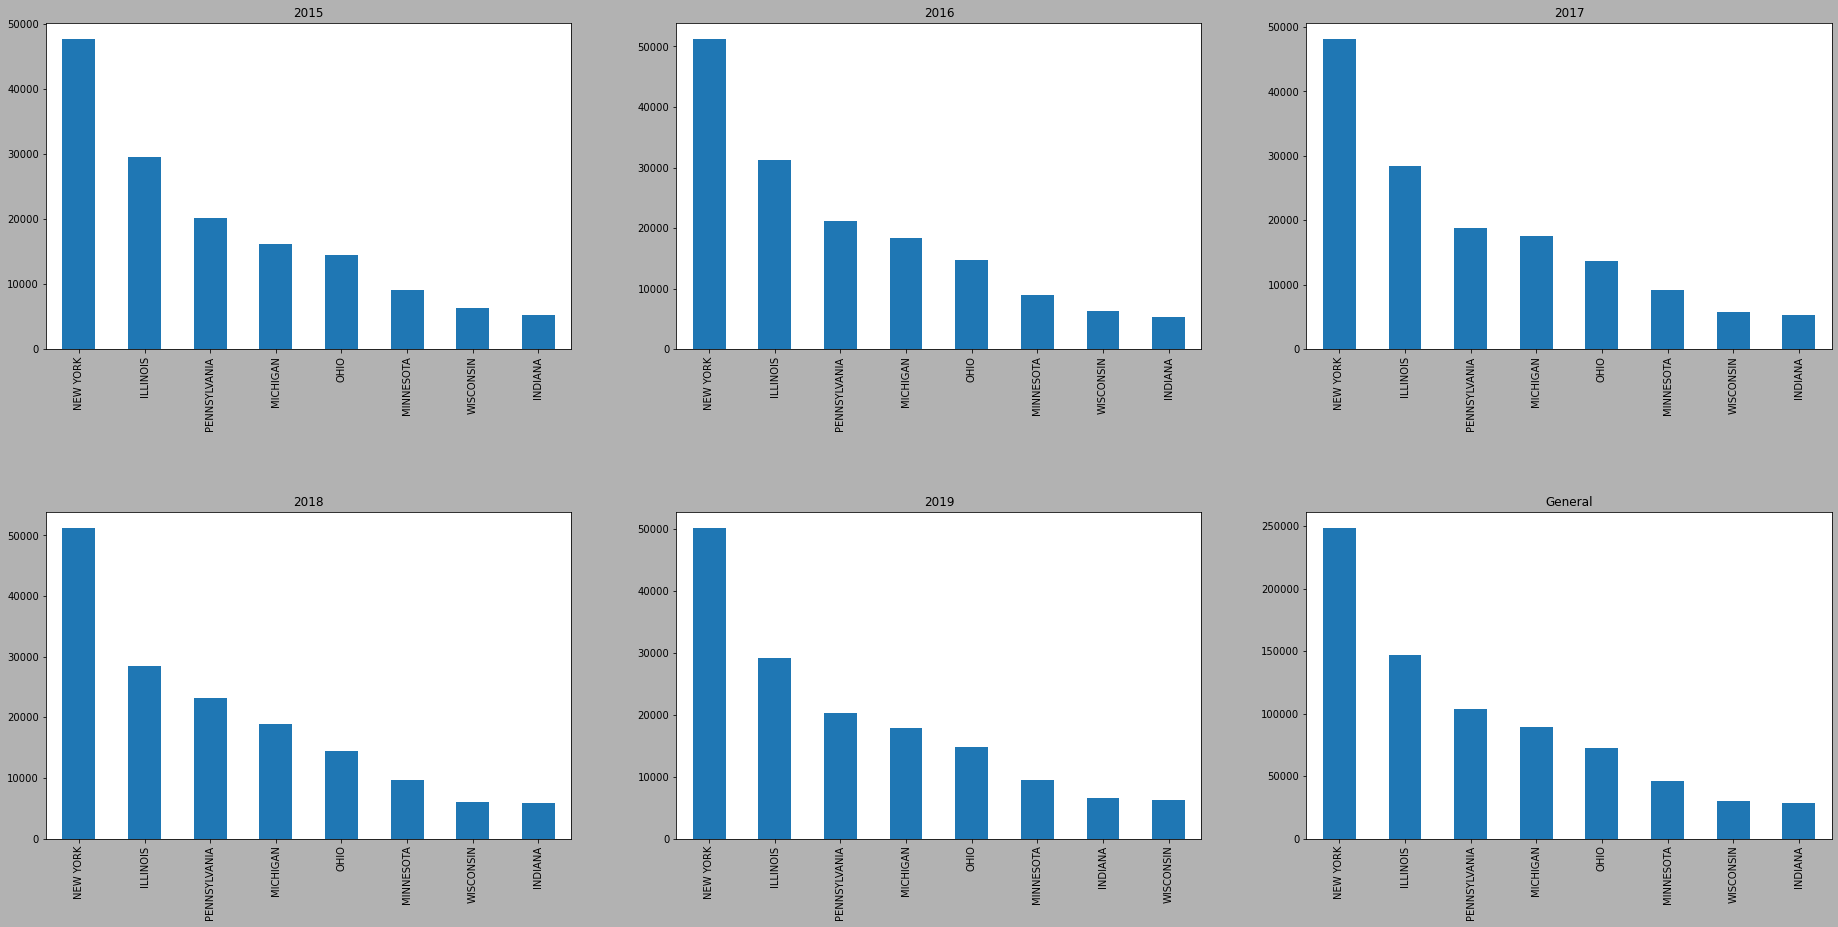

In [10]:
fig = plt.figure(figsize=(32,15))
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.patch.set_facecolor('#B2B2B2')

work_state_general = data.WORKSITE_STATE_FULL.value_counts(ascending=False)
work_state_2015 = data_2015.WORKSITE_STATE_FULL.value_counts(ascending=False)
work_state_2016 = data_2016.WORKSITE_STATE_FULL.value_counts(ascending=False)
work_state_2017 = data_2017.WORKSITE_STATE_FULL.value_counts(ascending=False)
work_state_2018 = data_2018.WORKSITE_STATE_FULL.value_counts(ascending=False)
work_state_2019 = data_2019.WORKSITE_STATE_FULL.value_counts(ascending=False)

plt.subplot(2, 3, 1)
work_state_2015.plot(kind="bar")
plt.title("2015")

plt.subplot(2, 3, 2)
work_state_2016.plot(kind="bar")
plt.title("2016")

plt.subplot(2, 3, 3)
work_state_2017.plot(kind="bar")
plt.title("2017")

plt.subplot(2, 3, 4)
work_state_2018.plot(kind="bar")
plt.title("2018")

plt.subplot(2, 3, 5)
work_state_2019.plot(kind="bar")
plt.title("2019")

plt.subplot(2, 3, 6)
work_state_general.plot(kind="bar")
plt.title("General")

plt.show()

---
# ¿Que ciudades ofrecen la mayor cantidad de visas H1-B? (separados por año)
---

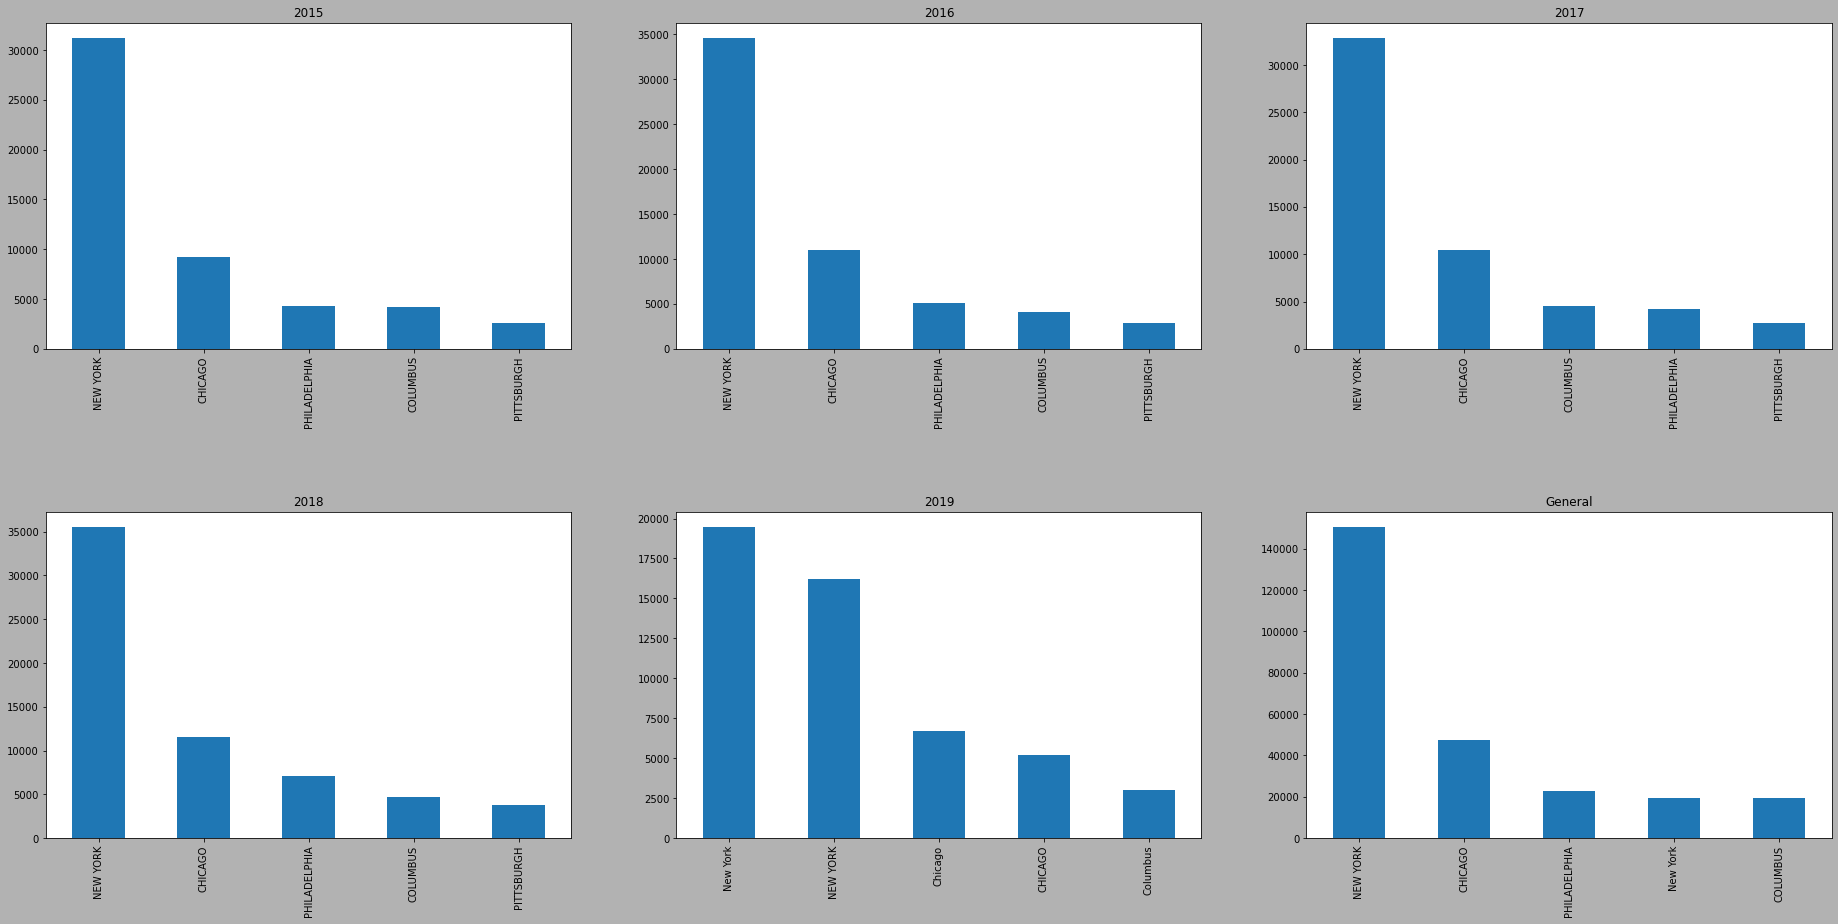

In [17]:
fig = plt.figure(figsize=(32,15))
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.patch.set_facecolor('#B2B2B2')

work_city_general = data.WORKSITE_CITY.value_counts(ascending=False).head(5)
work_city_2015 = data_2015.WORKSITE_CITY.value_counts(ascending=False).head(5)
work_city_2016 = data_2016.WORKSITE_CITY.value_counts(ascending=False).head(5)
work_city_2017 = data_2017.WORKSITE_CITY.value_counts(ascending=False).head(5)
work_city_2018 = data_2018.WORKSITE_CITY.value_counts(ascending=False).head(5)
work_city_2019 = data_2019.WORKSITE_CITY.value_counts(ascending=False).head(5)

plt.subplot(2, 3, 1)
work_city_2015.plot(kind="bar")
plt.title("2015")

plt.subplot(2, 3, 2)
work_city_2016.plot(kind="bar")
plt.title("2016")

plt.subplot(2, 3, 3)
work_city_2017.plot(kind="bar")
plt.title("2017")

plt.subplot(2, 3, 4)
work_city_2018.plot(kind="bar")
plt.title("2018")

plt.subplot(2, 3, 5)
work_city_2019.plot(kind="bar")
plt.title("2019")

plt.subplot(2, 3, 6)
work_city_general.plot(kind="bar")
plt.title("General")

plt.show()


---
# ¿Que empesas ofrecen la mayor cantidad de visas H1-B? (separados por año)
---

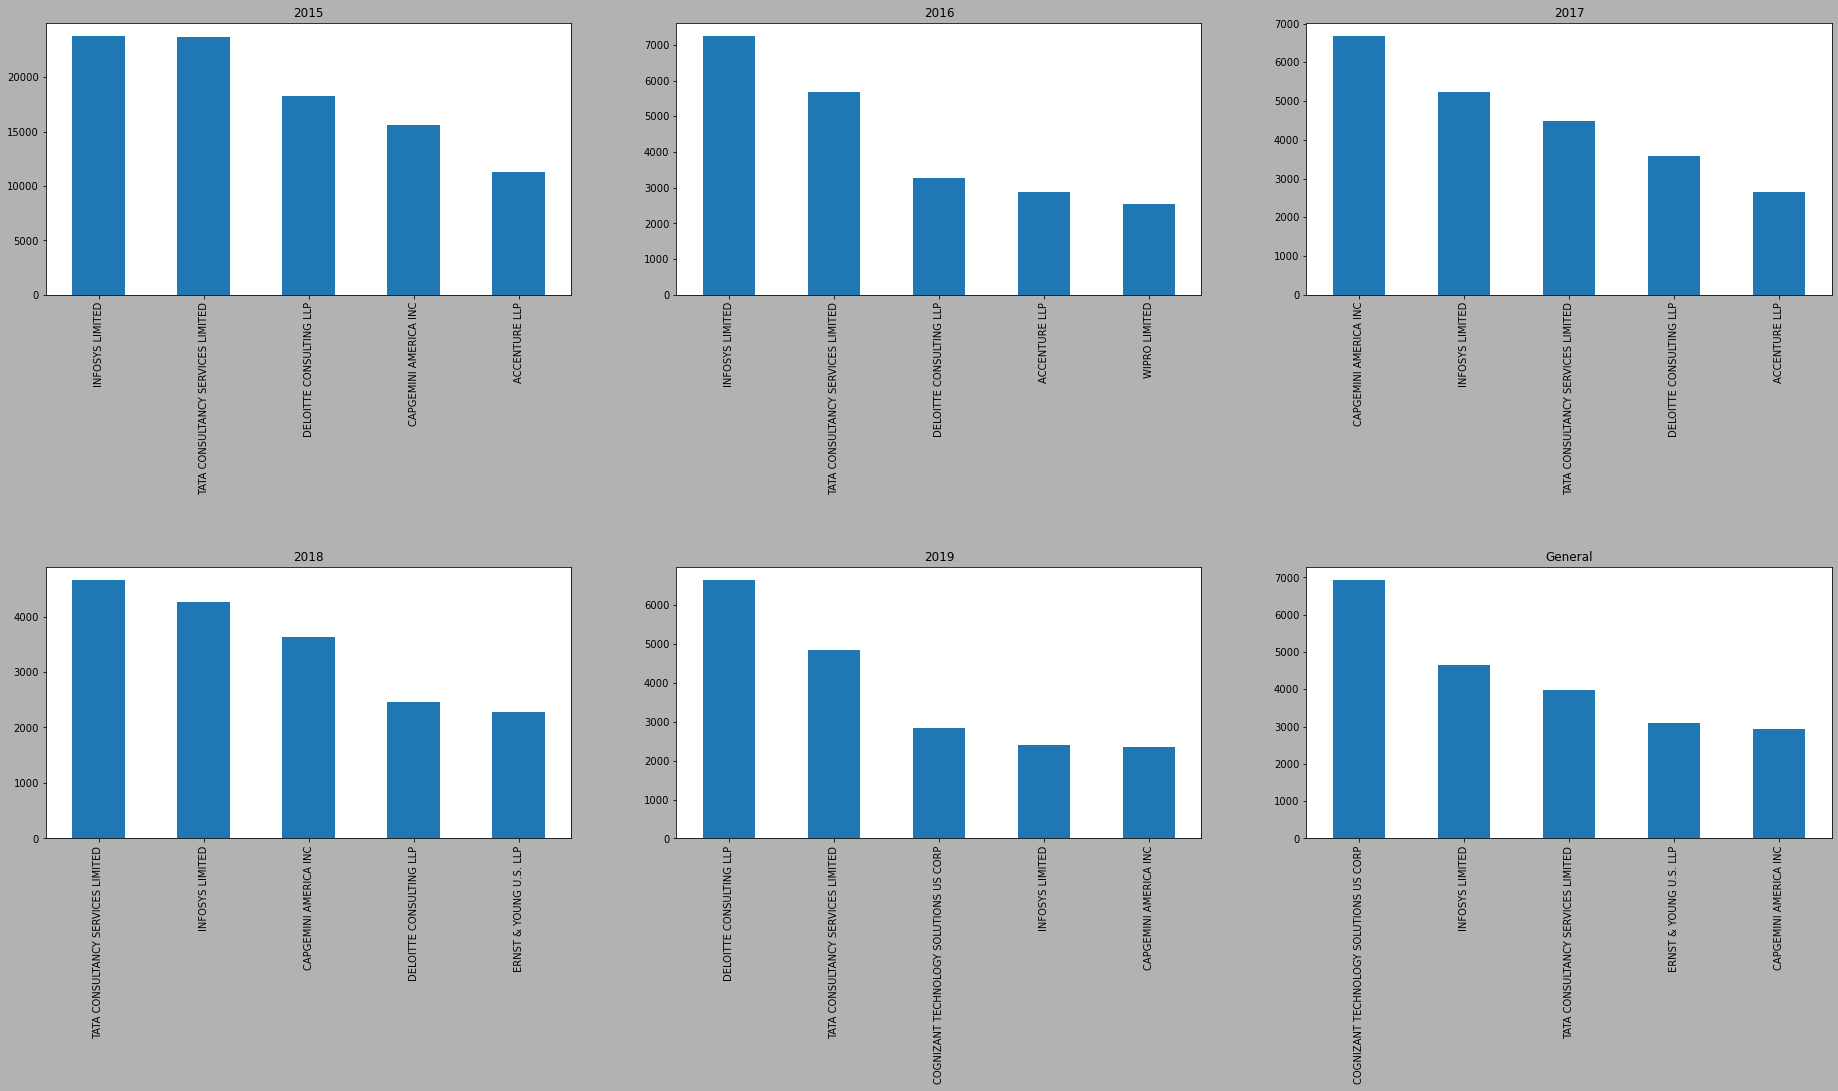

In [19]:
fig = plt.figure(figsize=(32,15))
fig.tight_layout()
fig.subplots_adjust(hspace=1)
fig.patch.set_facecolor('#B2B2B2')

employer_name_general = data.EMPLOYER_NAME.value_counts(ascending=False).head(5)
employer_name_2015 = data_2015.EMPLOYER_NAME.value_counts(ascending=False).head(5)
employer_name_2016 = data_2016.EMPLOYER_NAME.value_counts(ascending=False).head(5)
employer_name_2017 = data_2017.EMPLOYER_NAME.value_counts(ascending=False).head(5)
employer_name_2018 = data_2018.EMPLOYER_NAME.value_counts(ascending=False).head(5)
employer_name_2019 = data_2019.EMPLOYER_NAME.value_counts(ascending=False).head(5)

plt.subplot(2, 3, 1)
employer_name_general.plot(kind="bar")
plt.title("2015")

plt.subplot(2, 3, 2)
employer_name_2015.plot(kind="bar")
plt.title("2016")

plt.subplot(2, 3, 3)
employer_name_2016.plot(kind="bar")
plt.title("2017")

plt.subplot(2, 3, 4)
employer_name_2017.plot(kind="bar")
plt.title("2018")

plt.subplot(2, 3, 5)
employer_name_2018.plot(kind="bar")
plt.title("2019")

plt.subplot(2, 3, 6)
employer_name_2019.plot(kind="bar")
plt.title("General")

plt.show()

---
# Guardamos los datos en un archivo csv
---

In [ ]:
data.to_csv('visa_H1B_certified.csv')